In [15]:
import numpy as np
from dualtime.src.mclachlan import VarQITE
from gibbs.utils import create_hamiltonian_lattice,printarray,expected_state,state_from_ansatz
from gibbs.preparation.varqite import efficient_su2_ansatz,brute_force_optimization, efficient_su2_ansatz_V3, pauli_rotations_ansatz
from gibbs.preparation.free_energy import brute_cmaes
from qiskit.opflow import PauliSumOp
from qiskit.quantum_info import SparsePauliOp
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


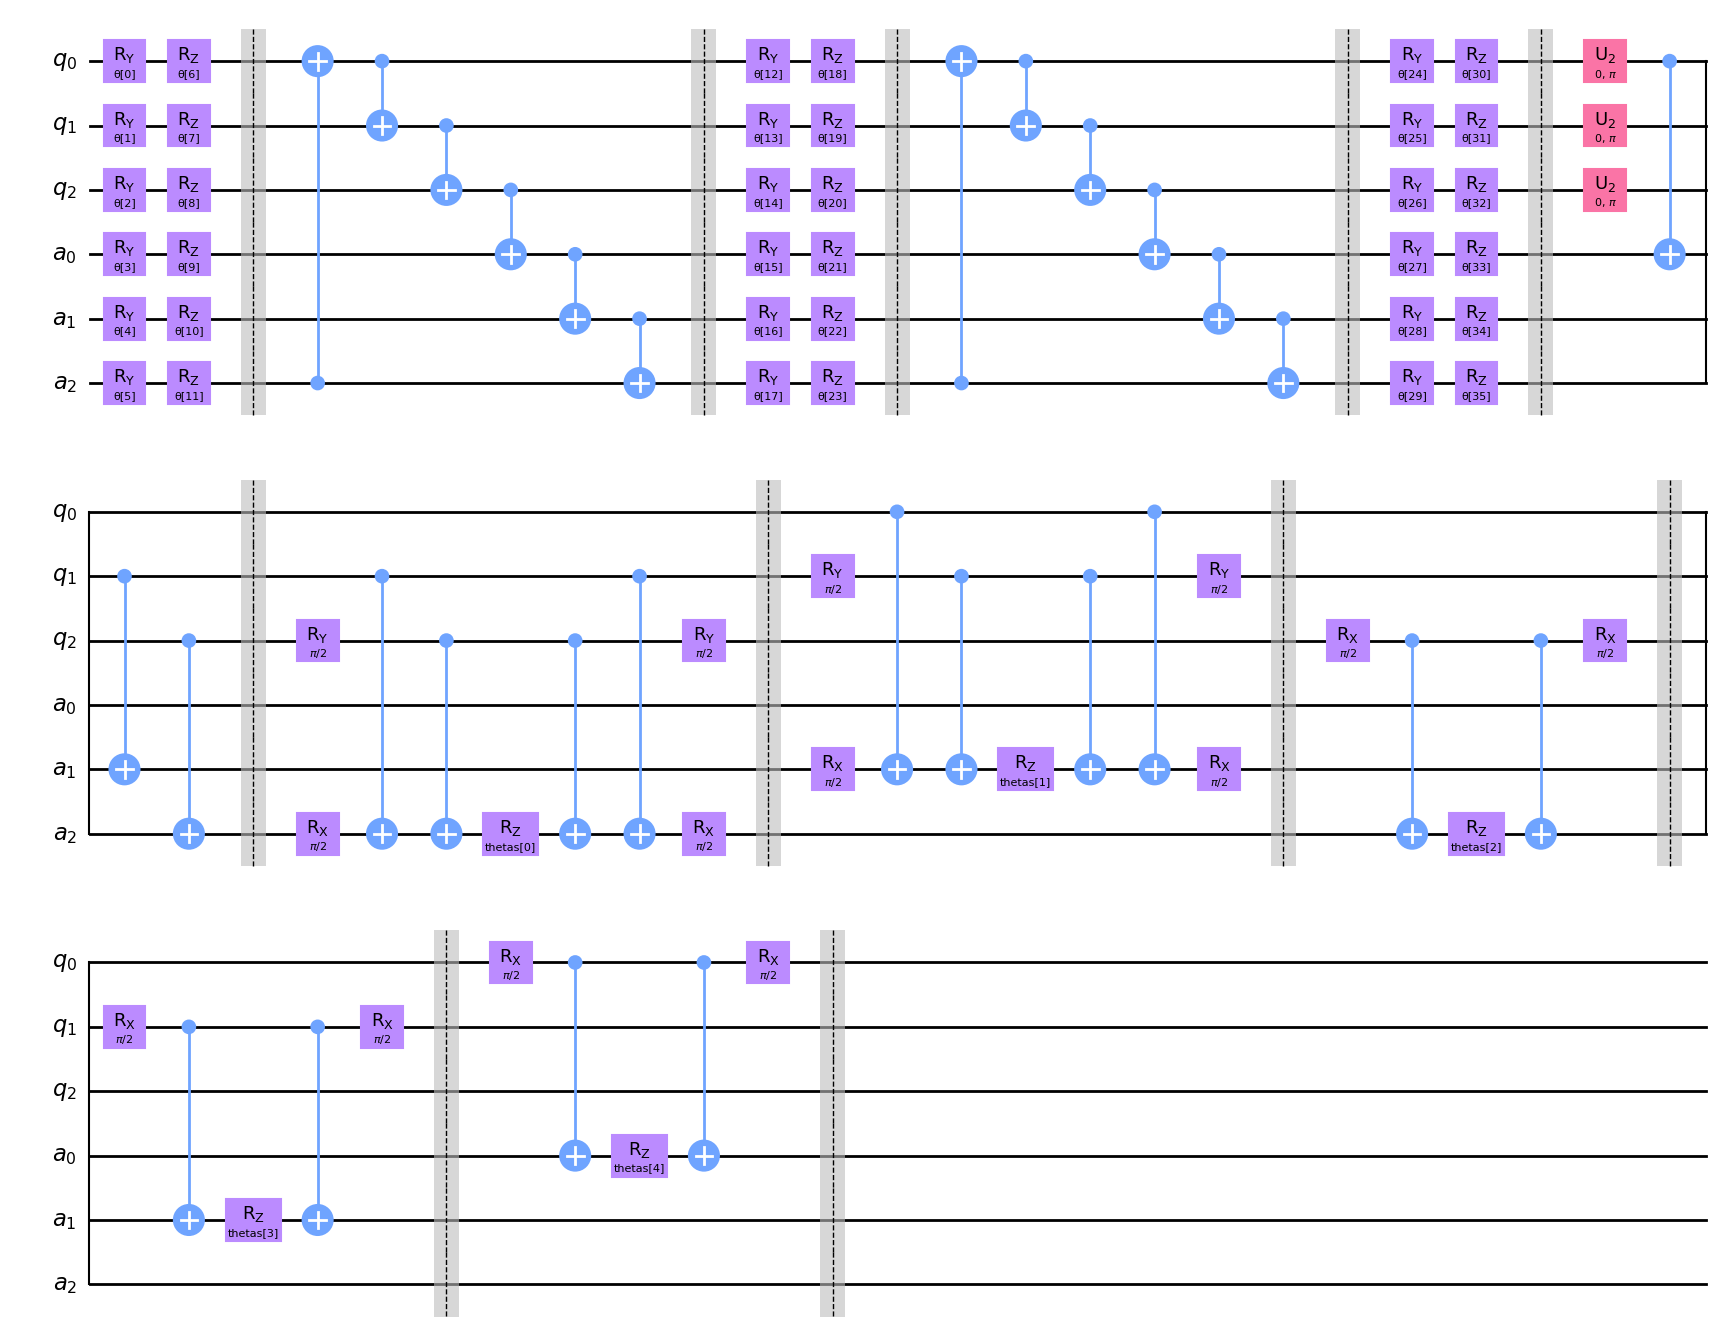

In [26]:

beta = 1.0
hamiltonian = create_hamiltonian_lattice(3,1.3,1.7)
N = hamiltonian.num_qubits
ansatz,x0 = pauli_rotations_ansatz(hamiltonian,depth = 2,entanglement="circular")
# ansatz,x0 = efficient_su2_ansatz(hamiltonian,depth = 2,entanglement="circular")
display(ansatz.decompose().draw(output='mpl'))
varqite = VarQITE(ansatz,x0,backend=None)
result = varqite.evolve(PauliSumOp(hamiltonian^("I"*N)),beta/2,timestep = 0.01)
final_state = state_from_ansatz(ansatz,result.parameters[-1])

In [25]:
print("The max difference is:", np.max(np.abs(final_state-expected_state(hamiltonian,beta))))
print("The fidelity between the 2 states is:", state_fidelity(final_state,expected_state(hamiltonian,beta)))
print("Using VarQITE we get the following state:")
printarray(final_state,3,np.abs)
print("The expected state is:")
printarray(expected_state(hamiltonian,beta),3,np.abs)

The max difference is: 0.1378130680630902
The fidelity between the 2 states is: 0.8861395117395396
Using VarQITE we get the following state:
[[0.125 0.116 0.116 0.108 0.116 0.108 0.108 0.1  ]
 [0.116 0.125 0.108 0.116 0.108 0.116 0.1   0.108]
 [0.116 0.108 0.125 0.116 0.108 0.1   0.116 0.108]
 [0.108 0.116 0.116 0.125 0.1   0.108 0.108 0.116]
 [0.116 0.108 0.108 0.1   0.125 0.116 0.116 0.108]
 [0.108 0.116 0.1   0.108 0.116 0.125 0.108 0.116]
 [0.108 0.1   0.116 0.108 0.116 0.108 0.125 0.116]
 [0.1   0.108 0.108 0.116 0.108 0.116 0.116 0.125]]
The expected state is:
[[0.048 0.062 0.104 0.064 0.062 0.09  0.064 0.045]
 [0.062 0.095 0.116 0.085 0.086 0.147 0.077 0.064]
 [0.104 0.116 0.263 0.147 0.116 0.149 0.147 0.09 ]
 [0.064 0.085 0.147 0.095 0.077 0.116 0.086 0.062]
 [0.062 0.086 0.116 0.077 0.095 0.147 0.085 0.064]
 [0.09  0.147 0.149 0.116 0.147 0.263 0.116 0.104]
 [0.064 0.077 0.147 0.086 0.085 0.116 0.095 0.062]
 [0.045 0.064 0.09  0.062 0.064 0.104 0.062 0.048]]


In [20]:
from qiskit.quantum_info import state_fidelity
state_fidelity(final_state,expected_state(hamiltonian,beta))

0.47059202318830834

In [4]:
brute_params,loss,fevals = brute_cmaes(ansatz=ansatz, hamiltonian=hamiltonian, beta=beta, max_evals=10000)
print(loss,fevals)

KeyboardInterrupt: 

In [ ]:
brute_state= state_from_ansatz(ansatz,brute_params)

print("The max difference is:", np.max(np.abs(final_state-expected_state(hamiltonian,beta))))
print("Using VarQITE we get the following state:")
printarray(final_state,3,np.abs)
print("The expected state is:")
printarray(expected_state(hamiltonian,beta),3,np.abs)
print("Optimizing the parameters of the ansatz using brute force we get the following state:")
printarray(brute_state,3,np.abs)

The max difference is: 0.19039853898894127
Using VarQITE we get the following state:
[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]
The expected state is:
[[0.25 0.   0.   0.19]
 [0.   0.25 0.19 0.  ]
 [0.   0.19 0.25 0.  ]
 [0.19 0.   0.   0.25]]
Optimizing the parameters of the ansatz using brute force we get the following state:
[[0.25 0.   0.   0.19]
 [0.   0.25 0.19 0.  ]
 [0.   0.19 0.25 0.  ]
 [0.19 0.   0.   0.25]]


In [ ]:
from surfer.gradient import ReverseGradient
gradient = ReverseGradient(do_checks=False)
print(gradient.compute(hamiltonian^("I"*N), ansatz, x0))
display(ansatz.decompose().draw())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░─────────────■───░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├─░─»
     ├──────────┤├──────────┤ ░           ┌─┴─┐ ░  ├──────────┤├───────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░────────■──┤ X ├─░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├─░─»
     ├──────────┤├──────────┤ ░      ┌─┴─┐└───┘ ░ ┌┴──────────┤├───────────┤ ░ »
a_0: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░───■──┤ X ├──────░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├─░─»
     ├──────────┤├──────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ »
a_1: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░─┤ X ├───────────░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─░─»
     └──────────┘└──────────┘ ░ └───┘           ░ └───────────┘└───────────┘ ░ »
«                     ░ ┌───────────┐┌───────────┐ ░                 ░ »
«q_0: ────────────■───░─┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├─░─────────────■───░─»
«               ┌─┴─┐ ░ ├───────────┤├───────────┤ ░           ┌─┴─┐ ░ »
«q_1: ───────■──┤ X ├─░─┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├─░────────■──┤ X ├─░─»
«          ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘ ░ »
«a_0: ──■──┤ X ├──────░─┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├─░───■──┤ X ├──────░─»
«     ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘      ░ »
«a_1: ┤ X ├───────────░─┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├─░─┤ X ├───────────░─»
«     └───┘           ░ └───────────┘└───────────┘ ░ └───┘           ░ »
«     ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐»
«q_0: ┤ Ry(θ[24]) ├┤ Rz(θ[28]) ├─░─────────────■───░─┤ Ry(θ[32]) ├┤ Rz(θ[36]) ├»
«     ├───────────┤├───────────┤ ░           ┌─┴─┐ ░ ├───────────┤├───────────┤»
«q_1: ┤ Ry(θ[25]) ├┤ Rz(θ[29]) ├─░────────■──┤ X ├─░─┤ Ry(θ[33]) ├┤ Rz(θ[37]) ├»
«     ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤»
«a_0: ┤ Ry(θ[26]) ├┤ Rz(θ[30]) ├─░───■──┤ X ├──────░─┤ Ry(θ[34]) ├┤ Rz(θ[38]) ├»
«     ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤»
«a_1: ┤ Ry(θ[27]) ├┤ Rz(θ[31]) ├─░─┤ X ├───────────░─┤ Ry(θ[35]) ├┤ Rz(θ[39]) ├»
«     └───────────┘└───────────┘ ░ └───┘           ░ └───────────┘└───────────┘»
«      ░                 ░ ┌───────────┐┌───────────┐          
«q_0: ─░─────────────■───░─┤ Ry(θ[40]) ├┤ Rz(θ[44]) ├──■───────
«      ░           ┌─┴─┐ ░ ├───────────┤├───────────┤  │       
«q_1: ─░────────■──┤ X ├─░─┤ Ry(θ[41]) ├┤ Rz(θ[45]) ├──┼────■──
«      ░      ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤┌─┴─┐  │  
«a_0: ─░───■──┤ X ├──────░─┤ Ry(θ[42]) ├┤ Rz(θ[46]) ├┤ X ├──┼──
«      ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤└───┘┌─┴─┐
«a_1: ─░─┤ X ├───────────░─┤ Ry(θ[43]) ├┤ Rz(θ[47]) ├─────┤ X ├
«      ░ └───┘           ░ └───────────┘└───────────┘     └───┘

In [ ]:
brute_result = brute_force_optimization(hamiltonian,ansatz,x0,beta = beta)

(-1.3862943611198908+0j)
(-0.970116539379804+0j)
(-0.9701165393798041+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798038+0j)


/home/drudis/python_environements/JulienVarQITE/lib64/python3.10/site-packages/scipy/optimize/_cobyla_py.py:273: ComplexWarning: Casting complex values to real discards the imaginary part
  xopt, info = cobyla.minimize(calcfc, m=m, x=np.copy(x0), rhobeg=rhobeg,


(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.970116539379804+0j)
(-1.3862943611198906+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198906+0j)
(-1.3862943611198906+0j)
(-0.9701165393798038+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.970116539379804+0j)
(-0.9701165393798041+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798039+0j)
(-1.3862943611198904+0j)
(-1.3862943611198908+0j)
(-1.3862943611198908+0j)
(-1.3862943611198908+0j)
(-0.8955986546050507+0j)
(-1.0802754454912284+0j)
(-1.2909397915118783+0j)
(-1.

In [ ]:
state = state_from_ansatz(ansatz,brute_result.x)
from qiskit.quantum_info import entropy
entropy(state)

2.0000000000000004

In [ ]:
printarray(state)

[[ 0.25 -0.   -0.   -0.  ]
 [-0.    0.25 -0.   -0.  ]
 [-0.   -0.    0.25  0.  ]
 [-0.   -0.    0.    0.25]]


In [ ]:
x0.shape

(48,)